# Imshow for Bokeh
Bokeh is a great library to visualize scientific data. I like it especially, because it is very easy to store some figures as .html file, which can be viewed in an interactive way with a browser of your choice. It is great to visualize overloaded scatter plots. In static scatter plots the points rendered on top of each other. So you might see only a big blop in the area of highest density. In an interactive scatter plot you can zoom into a certain area of the plot to get a better feeling of the distribution.
One thing bothers me about Bokeh. The imshow functionality of matplotlib, to visualize 2D numpy arrays, is missing. This notebook shows how to use Bokeh functions to build something very similar.

A numpy array is generated with skimage. There are very easy to use examples. Lets take the astronaut image. The image is converted from rgb to a single value for each data point.

In [1]:
from skimage import color, data

astro = color.rgb2gray(data.astronaut())

The following code snippet shows you how to plot the image with matplotlib. Viridis is the colormap of my choice. The guys from matplotlib have put a lot of effort to design this colormap.
* The contrast of the colormap is optimized for human eyes.
* You can print the data as grey image and it still makes sense.
* Colorblind people see the data as good healthy people.

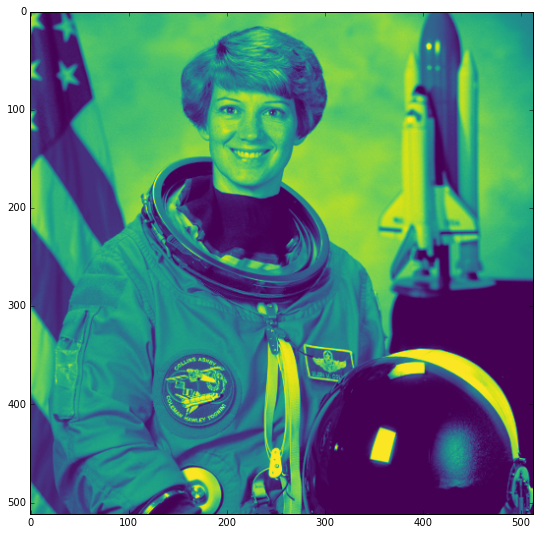

In [2]:
import matplotlib.pylab as plt

%matplotlib inline  

plt.figure(figsize=(9, 9))
plt.imshow(astro, cmap='viridis')

The following code shows my bokeh imshow implementation. Bokeh allows us to visualize images with image_rgba. We can use this function to plot our numpy array. The data is rescaled to [0,255] and then converted to rgba. Viridis is also implemented in Bokeh.

In [3]:
from bokeh.palettes import Viridis256
import numpy as np

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def scalar_to_virids(value):
    return hex_to_rgb(Viridis256[int(value)])


def imshow(img):
    img_shape = np.shape(img)
    plot_img = np.empty(img_shape, dtype=np.uint32)
    view = plot_img.view(dtype=np.uint8).reshape((img_shape[0], img_shape[1], 4))

    max_val = np.max(img)
    min_val = np.min(img)

    rescaled_img = (img - min_val) / (max_val - min_val) * 255
    viridis_img = np.array(np.vectorize(scalar_to_virids)(rescaled_img))
    viridis_img = np.rollaxis(viridis_img, 0, 3)

    view[::-1,:,:3] = viridis_img
    view[:,:,3] = 255

    fig= figure(x_range=(0,10), y_range=(0,10))
    fig.image_rgba(image=[plot_img], x=0, y=0, dw=10, dh=10)
    return fig

Now, you can use bokeh easily to visualize your data. This example shows, that zooming, dragging and scrolling is still possible.

In [4]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

fig = imshow(astro)
output_notebook()
show(fig)

Loading BokehJS ...